In [41]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

#I make a data frame that has the weekly mortgage rates for 30Y-FRM provided by Freddie Mac.
#The data begins during March 1971, runs to December 2021
weeklyMortgageRatesFreddy = pd.read_csv('./MortgageRatesFreddyMac.csv')
weeklyMortgageRatesFreddy = weeklyMortgageRatesFreddy[["Week", "30YrFRM"]]

#Now I import the same mortgage rates provided by Optimal Blue. 
#The data begins in January 2015, and ends to July 2022

#Here are my nicknames for the different types of LTV values and credit scores:

#1 corresponds to an LTV value <= 80, 
#2 corresponds to an LTV value >80

#A : FICO <680
#B : FICO in [680,699]
#C : FICO in [700,719]
#D : FICO in [720,739]
#E : FICO >740

#So, 30YR2D is 30-year fixed mortgage rates for with LTV value >80 whose FICO is in [720,739].

weeklyMortgageRatesOB = pd.read_csv('./OB.csv')
weeklyMortgageRatesOB.columns

Index(['Week', '30YR', '30YR1A', '30YR1B', '30YR1C', '30YR1D', '30YR1E',
       '30YR2A', '30YR2B', '30YR2C', '30YR2D', '30YR2E'],
      dtype='object')

In [42]:
#The data from Optimal Blue comes in as percentages, so this code removes the percentage symbols.

weeklyMortgageRatesOB['30YR'] = weeklyMortgageRatesOB['30YR'].str.rstrip("%").astype(float)
weeklyMortgageRatesOB['30YR1A'] = weeklyMortgageRatesOB['30YR1A'].str.rstrip("%").astype(float)
weeklyMortgageRatesOB['30YR1B'] = weeklyMortgageRatesOB['30YR1B'].str.rstrip("%").astype(float)
weeklyMortgageRatesOB['30YR1C'] = weeklyMortgageRatesOB['30YR1C'].str.rstrip("%").astype(float)
weeklyMortgageRatesOB['30YR1D'] = weeklyMortgageRatesOB['30YR1D'].str.rstrip("%").astype(float)
weeklyMortgageRatesOB['30YR1E'] = weeklyMortgageRatesOB['30YR1E'].str.rstrip("%").astype(float)
weeklyMortgageRatesOB['30YR2A'] = weeklyMortgageRatesOB['30YR2A'].str.rstrip("%").astype(float)
weeklyMortgageRatesOB['30YR2B'] = weeklyMortgageRatesOB['30YR2B'].str.rstrip("%").astype(float)
weeklyMortgageRatesOB['30YR2C'] = weeklyMortgageRatesOB['30YR2C'].str.rstrip("%").astype(float)
weeklyMortgageRatesOB['30YR2D'] = weeklyMortgageRatesOB['30YR2D'].str.rstrip("%").astype(float)
weeklyMortgageRatesOB['30YR2E'] = weeklyMortgageRatesOB['30YR2E'].str.rstrip("%").astype(float)

In [43]:
#Verifying that the precentage symbols have been removed.

print(weeklyMortgageRatesOB.head())
print(weeklyMortgageRatesFreddy.head())

     Week   30YR  30YR1A  30YR1B  30YR1C  30YR1D  30YR1E  30YR2A  30YR2B  \
0  1/2/15  4.171   4.542   4.242   4.122   4.057   3.994   4.535   4.372   
1  1/5/15  4.122   4.484   4.265   4.154   4.038   3.967   4.534   4.300   
2  1/6/15  4.022   4.387   4.120   4.029   3.914   3.870   4.441   4.264   
3  1/7/15  4.035   4.392   4.155   4.054   3.974   3.872   4.475   4.266   
4  1/8/15  4.062   4.433   4.160   4.054   3.958   3.894   4.487   4.349   

   30YR2C  30YR2D  30YR2E  
0   4.298   4.190   4.139  
1   4.289   4.157   4.090  
2   4.190   4.112   4.032  
3   4.218   4.074   4.026  
4   4.285   4.145   4.042  
        Week  30YrFRM
0   4/2/1971     7.33
1   4/9/1971     7.31
2  4/16/1971     7.31
3  4/23/1971     7.31
4  4/30/1971     7.29


In [44]:
#Now we upload the prepayment rates (I edited the .csv file a bit containing the CPR rates that Chris supplied to us)
#The data type of the dates is "object" so we will need to change that.

MonthlyCPR = pd.read_csv('../data/MonthlyCPRNumericDates.csv')
MonthlyCPR.columns

Index(['Date', 'FN30CPR', 'FN30WAC', 'FN30WALA', 'FN30WAM'], dtype='object')

In [45]:
MonthlyCPR.head(10)

,Date,FN30CPR,FN30WAC,FN30WALA,FN30WAM
0,6/1/22,9.3,3.53,34,320
1,5/1/22,9.9,3.51,34,320
2,4/1/22,11.4,3.49,34,320
3,3/1/22,14.2,3.49,34,320
4,2/1/22,13.2,3.49,34,320
5,1/1/22,14.8,3.50,34,320
6,12/1/21,18.7,3.51,34,320
7,11/1/21,20.2,3.53,34,320
8,10/1/21,22.2,3.55,34,320
9,9/1/21,24.1,3.57,35,319


In [46]:
#This converts the date element from object type to the datetime type in the CPR table.

MonthlyCPR['Date'] = pd.to_datetime(MonthlyCPR['Date'])

In [47]:
weeklyMortgageRatesOB.head()

,Week,30YR,30YR1A,30YR1B,30YR1C,30YR1D,30YR1E,30YR2A,30YR2B,30YR2C,30YR2D,30YR2E
0,1/2/15,4.171,4.542,4.242,4.122,4.057,3.994,4.535,4.372,4.298,4.190,4.139
1,1/5/15,4.122,4.484,4.265,4.154,4.038,3.967,4.534,4.300,4.289,4.157,4.090
2,1/6/15,4.022,4.387,4.120,4.029,3.914,3.870,4.441,4.264,4.190,4.112,4.032
3,1/7/15,4.035,4.392,4.155,4.054,3.974,3.872,4.475,4.266,4.218,4.074,4.026
4,1/8/15,4.062,4.433,4.160,4.054,3.958,3.894,4.487,4.349,4.285,4.145,4.042


In [48]:
#Checking to see what the Optimal Blue mortgage rates data looks like.

weeklyMortgageRatesOB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Week    1885 non-null   object 
 1   30YR    1885 non-null   float64
 2   30YR1A  1885 non-null   float64
 3   30YR1B  1885 non-null   float64
 4   30YR1C  1885 non-null   float64
 5   30YR1D  1885 non-null   float64
 6   30YR1E  1885 non-null   float64
 7   30YR2A  1885 non-null   float64
 8   30YR2B  1885 non-null   float64
 9   30YR2C  1885 non-null   float64
 10  30YR2D  1885 non-null   float64
 11  30YR2E  1885 non-null   float64
dtypes: float64(11), object(1)
memory usage: 176.8+ KB


In [49]:
#Again, this changes the Week data type to datetime from object.

weeklyMortgageRatesOB['Week'] = pd.to_datetime(weeklyMortgageRatesOB['Week'])

In [50]:
#Checking to see if it worked

weeklyMortgageRatesOB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Week    1885 non-null   datetime64[ns]
 1   30YR    1885 non-null   float64       
 2   30YR1A  1885 non-null   float64       
 3   30YR1B  1885 non-null   float64       
 4   30YR1C  1885 non-null   float64       
 5   30YR1D  1885 non-null   float64       
 6   30YR1E  1885 non-null   float64       
 7   30YR2A  1885 non-null   float64       
 8   30YR2B  1885 non-null   float64       
 9   30YR2C  1885 non-null   float64       
 10  30YR2D  1885 non-null   float64       
 11  30YR2E  1885 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 176.8 KB


In [51]:
#Finally, conversion for the dates in the Freddy Mac Mortgage rates data.

weeklyMortgageRatesFreddy['Week'] = pd.to_datetime(weeklyMortgageRatesFreddy['Week'])

In [52]:
#Again, checking to see if the conversion worked.

weeklyMortgageRatesFreddy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2649 entries, 0 to 2648
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Week     2649 non-null   datetime64[ns]
 1   30YrFRM  2649 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 41.5 KB


In [53]:
MonthlyCPR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      342 non-null    datetime64[ns]
 1   FN30CPR   342 non-null    float64       
 2   FN30WAC   342 non-null    float64       
 3   FN30WALA  342 non-null    int64         
 4   FN30WAM   342 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 13.5 KB


In [54]:
#This adds to the MonthlyCPR data frame a column containing the month value.

MonthlyCPR["Month"] = pd.to_datetime(MonthlyCPR['Date']).dt.month

In [55]:
#This adds to the MonthlyCPR data frame a column containing the year value.

MonthlyCPR['Year'] = pd.to_datetime(MonthlyCPR['Date']).dt.year

In [56]:
#This adds to the Optimal Blue data frame a column containing the month value.

weeklyMortgageRatesOB["Month"] = pd.to_datetime(weeklyMortgageRatesOB['Week']).dt.month

In [57]:
#This adds to the Optimal Blue data frame a column containing the month value.

weeklyMortgageRatesOB["Year"] = pd.to_datetime(weeklyMortgageRatesOB['Week']).dt.year

In [58]:
#Just taking another peek at the Mortgage rates Data Frame supplied by freddy mac.
#We will need to add columns for the month and year.

weeklyMortgageRatesFreddy.head()

,Week,30YrFRM
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


In [59]:
#This adds to the Freddy Mac data frame a column containing the month value.
#This adds to the Freddy Mac data frame a column containing the year value.

weeklyMortgageRatesFreddy["Month"] = pd.to_datetime(weeklyMortgageRatesFreddy['Week']).dt.month
weeklyMortgageRatesFreddy["Year"] = pd.to_datetime(weeklyMortgageRatesFreddy['Week']).dt.year

In [60]:
#Here I just double check that it worked.

weeklyMortgageRatesFreddy.head()

,Week,30YrFRM,Month,Year
0,1971-04-02,7.33,4,1971
1,1971-04-09,7.31,4,1971
2,1971-04-16,7.31,4,1971
3,1971-04-23,7.31,4,1971
4,1971-04-30,7.29,4,1971


In [61]:
#Here I am just testing my abilities to group by the month and year, and then take the average in each
#I am testing it on the Freddy Mac data frame first.

weeklyMortgageRatesFreddy.groupby(['Year', 'Month']).mean()

30YrFRM
Year Month         
1971 4       7.3100
     5       7.4250
     6       7.5300
     7       7.6040
     8       7.6975
...             ...
2021 8       2.8425
     9       2.9000
     10      3.0675
     11      3.0675
     12      3.0980

[609 rows x 1 columns]

In [62]:
#I noticed that the Freddy mac data shows oldest dates first
#and I wanted to see in which order the CPR data is listed:

MonthlyCPR

,Date,FN30CPR,FN30WAC,FN30WALA,FN30WAM,Month,Year
0,2022-06-01,9.3,3.53,34,320,6,2022
1,2022-05-01,9.9,3.51,34,320,5,2022
2,2022-04-01,11.4,3.49,34,320,4,2022
3,2022-03-01,14.2,3.49,34,320,3,2022
4,2022-02-01,13.2,3.49,34,320,2,2022
...,...,...,...,...,...,...,...
337,1994-05-01,13.1,8.23,30,326,5,1994
338,1994-04-01,16.7,8.26,30,326,4,1994
339,1994-03-01,25.0,8.30,30,326,3,1994
340,1994-02-01,22.3,8.35,30,326,2,1994


In [63]:
#Now I flip the CPR data so that the oldest dates appear first

MonthlyCPR = MonthlyCPR.iloc[::-1]

In [64]:
#Now I just check that it worked

MonthlyCPR

,Date,FN30CPR,FN30WAC,FN30WALA,FN30WAM,Month,Year
341,1994-01-01,26.8,8.41,31,326,1,1994
340,1994-02-01,22.3,8.35,30,326,2,1994
339,1994-03-01,25.0,8.30,30,326,3,1994
338,1994-04-01,16.7,8.26,30,326,4,1994
337,1994-05-01,13.1,8.23,30,326,5,1994
...,...,...,...,...,...,...,...
4,2022-02-01,13.2,3.49,34,320,2,2022
3,2022-03-01,14.2,3.49,34,320,3,2022
2,2022-04-01,11.4,3.49,34,320,4,2022
1,2022-05-01,9.9,3.51,34,320,5,2022


In [65]:
#I noticed that the Freddy Mac mortgage rates data contains nothing in the year 2022.
# I noticed that the CPR info contains info from 2022.
#I make a new data frame of the CPR information containing info only for each month from 1994-2021.

MonthlyCPR94to21 = MonthlyCPR.loc[MonthlyCPR["Year"] <2022 ]

In [66]:
#Here I check that it worked. Note that this Data frame has 12 * 28 = 336 pieces of data begining Jan 1 1994.

MonthlyCPR94to21

,Date,FN30CPR,FN30WAC,FN30WALA,FN30WAM,Month,Year
341,1994-01-01,26.8,8.41,31,326,1,1994
340,1994-02-01,22.3,8.35,30,326,2,1994
339,1994-03-01,25.0,8.30,30,326,3,1994
338,1994-04-01,16.7,8.26,30,326,4,1994
337,1994-05-01,13.1,8.23,30,326,5,1994
...,...,...,...,...,...,...,...
10,2021-08-01,24.6,3.60,35,319,8,2021
9,2021-09-01,24.1,3.57,35,319,9,2021
8,2021-10-01,22.2,3.55,34,320,10,2021
7,2021-11-01,20.2,3.53,34,320,11,2021


In [67]:
#Now, I tailor the Freddy Mac data to only include the years 1994-2021.

weeklyMortgageRatesFreddy94to21 = weeklyMortgageRatesFreddy.loc[weeklyMortgageRatesFreddy["Year"] >= 1994 ]

In [68]:
#Here I just check that it worked, and also practiced grouping by the year/month and taking the mean.
#Notice that there are exactly 336 elements! Starting at January 1994.

weeklyMortgageRatesFreddy94to21.groupby(['Year', 'Month']).mean()

30YrFRM
Year Month         
1994 1       7.0600
     2       7.1525
     3       7.6750
     4       8.3160
     5       8.5975
...             ...
2021 8       2.8425
     9       2.9000
     10      3.0675
     11      3.0675
     12      3.0980

[336 rows x 1 columns]

In [69]:
#In this step, I make an ordered list of the above 336 elements and store as FredFRM_list. 
#Later we will add this to the CPR 1994-2922 data frame.

FredFRM_list = weeklyMortgageRatesFreddy94to21.groupby(['Year', 'Month']).mean()['30YrFRM'].tolist()

In [70]:
#Here I just double check that I saved the list of 336 monthly average mortgage rates properly.


FredFRM_list

[7.0600000000000005,
 7.1525,
 7.675,
 8.315999999999999,
 8.5975,
 8.3975,
 8.614,
 8.5125,
 8.64,
 8.925,
 9.17,
 9.198,
 9.1475,
 8.8275,
 8.462,
 8.32,
 7.955,
 7.566,
 7.6075,
 7.86,
 7.636,
 7.475,
 7.3774999999999995,
 7.2,
 7.029999999999999,
 7.075,
 7.624,
 7.925000000000001,
 8.07,
 8.32,
 8.245000000000001,
 8.001999999999999,
 8.23,
 7.915,
 7.618,
 7.5975,
 7.824,
 7.65,
 7.8975,
 8.1425,
 7.944,
 7.6899999999999995,
 7.4975,
 7.4799999999999995,
 7.43,
 7.294,
 7.205,
 7.095000000000001,
 6.994,
 7.0425,
 7.1275,
 7.140000000000001,
 7.144,
 6.9975000000000005,
 6.952,
 6.9225,
 6.7225,
 6.709999999999999,
 6.865,
 6.7379999999999995,
 6.785,
 6.8075,
 7.04,
 6.9159999999999995,
 7.145,
 7.55,
 7.632,
 7.9425,
 7.8225,
 7.851999999999999,
 7.7375,
 7.912000000000001,
 8.21,
 8.325,
 8.24,
 8.1525,
 8.515,
 8.288,
 8.1475,
 8.0275,
 7.912000000000001,
 7.795,
 7.745,
 7.382,
 7.0325,
 7.05,
 6.952,
 7.0775,
 7.145,
 7.159999999999999,
 7.1275,
 6.95,
 6.8175,
 6.6175,
 6.

In [71]:
#Now I add that list as a column in the 1994-2021 CPR table 
#I don't know why the big red warning box is there, but it doesn't seem to be an issue
#I seem to get a big red warning box every time I add a new column to a Data frame. Weird

MonthlyCPR94to21["Fred30YrAvG"] = FredFRM_list

C:\Users\kathe\AppData\Local\Temp/ipykernel_12056/147578769.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MonthlyCPR94to21["Fred30YrAvG"] = FredFRM_list


In [72]:
#Now I just checked that it worked.

MonthlyCPR94to21

,Date,FN30CPR,FN30WAC,FN30WALA,FN30WAM,Month,Year,Fred30YrAvG
341,1994-01-01,26.8,8.41,31,326,1,1994,7.0600
340,1994-02-01,22.3,8.35,30,326,2,1994,7.1525
339,1994-03-01,25.0,8.30,30,326,3,1994,7.6750
338,1994-04-01,16.7,8.26,30,326,4,1994,8.3160
337,1994-05-01,13.1,8.23,30,326,5,1994,8.5975
...,...,...,...,...,...,...,...,...
10,2021-08-01,24.6,3.60,35,319,8,2021,2.8425
9,2021-09-01,24.1,3.57,35,319,9,2021,2.9000
8,2021-10-01,22.2,3.55,34,320,10,2021,3.0675
7,2021-11-01,20.2,3.53,34,320,11,2021,3.0675


In [73]:
#I make a new column describing the incentive to prepay (determined by the Freddy mortgage rates)
#This is the difference between the Weighted average coupon and the current mortgage rate
#Again, we get a weird red warning box but everything seems to be OK.

MonthlyCPR94to21["incentive_fred"] = MonthlyCPR94to21["FN30WAC"] - MonthlyCPR94to21["Fred30YrAvG"]

C:\Users\kathe\AppData\Local\Temp/ipykernel_12056/3003837928.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MonthlyCPR94to21["incentive_fred"] = MonthlyCPR94to21["FN30WAC"] - MonthlyCPR94to21["Fred30YrAvG"]


In [74]:
#Now I just checked that it worked.

MonthlyCPR94to21

,Date,FN30CPR,FN30WAC,FN30WALA,FN30WAM,Month,Year,Fred30YrAvG,incentive_fred
341,1994-01-01,26.8,8.41,31,326,1,1994,7.0600,1.3500
340,1994-02-01,22.3,8.35,30,326,2,1994,7.1525,1.1975
339,1994-03-01,25.0,8.30,30,326,3,1994,7.6750,0.6250
338,1994-04-01,16.7,8.26,30,326,4,1994,8.3160,-0.0560
337,1994-05-01,13.1,8.23,30,326,5,1994,8.5975,-0.3675
...,...,...,...,...,...,...,...,...,...
10,2021-08-01,24.6,3.60,35,319,8,2021,2.8425,0.7575
9,2021-09-01,24.1,3.57,35,319,9,2021,2.9000,0.6700
8,2021-10-01,22.2,3.55,34,320,10,2021,3.0675,0.4825
7,2021-11-01,20.2,3.53,34,320,11,2021,3.0675,0.4625


******************************************************************


# In the next three lines of code, we produce 

## (1) A plot of CPR by mortgage rate for every month in the years 1994 - 2021, using data from Freddy Mac

## (2) A linear model fit from the data in part (1) featuring a weak negative correlation

## (3) A plot of CPR by incentive rate for every month in the years 1994 - 2021, using data from Freddy Mac and the weighted average coupon that Chris provided on July 14. This forms a weak S - shape

******************************************************************

<AxesSubplot:xlabel='Fred30YrAvG', ylabel='FN30CPR'>

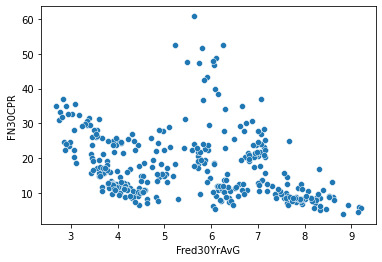

In [75]:
#Now, we plot each of the 336 months that happened in 1994-2021
#x axis is that month's mortgage rate determined by Freddy
#y axis is that month's CPR
#There is a weak negative correlation.
#I don't really know why there's a significantly weaker negative correlation than appears later in the 2015-2021 range.
#Perhaps that weird spike is attributed to the 2003-2005 period.
#People were very giddy to refinance/prepay during the 2003-2005 period according to Chris.

sns.scatterplot(data=MonthlyCPR94to21, x="Fred30YrAvG", y="FN30CPR")

In [76]:
#Now let's fit a linear model to the above scatter plot.
#Note the bad R squared score.

lmFred94to21 = sm.OLS.from_formula('FN30CPR ~ Fred30YrAvG', MonthlyCPR94to21)
resultFred94to21 = lmFred94to21.fit()
resultFred94to21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                FN30CPR   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     33.06
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           2.01e-08
Time:                        11:32:37   Log-Likelihood:                -1224.8
No. Observations:                 336   AIC:                             2454.
Df Residuals:                     334   BIC:                             2461.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      27.5075      1.771     15.534      0.000      24.024      30.991
Fred30YrAvG    -1.7511      0.305     -5.750      0.000      -2.350      -1.152
==============================================================================
Omnibus:                      110.611   Durbin-Watson:                   0.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.436
Skew:                           1.576   Prob(JB):                     3.84e-63
Kurtosis:                       6.255   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='incentive_fred', ylabel='FN30CPR'>

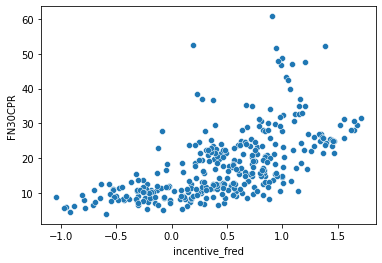

In [77]:
#Now let's plot CPR as a response to prepay incentive, using the Freddy Mac data from 94-21.
#Chris suggested that we should try fitting logistic curves to these types of scatter plots.
#It's not great, but you can sort of see an S shape happening here. 
#At the very least, a rough flat part is observed to the left of 0.0.

sns.scatterplot(data=MonthlyCPR94to21, x="incentive_fred", y="FN30CPR")

# The next three lines of code repeats the previous three lines, except we restrict to the years 2015 - 2022. Note the stronger negative correlation in the linear model.

In [80]:
MonthlyCPR15to21 = MonthlyCPR94to21.loc[MonthlyCPR94to21["Year"] >=2015 ]

<AxesSubplot:xlabel='Fred30YrAvG', ylabel='FN30CPR'>

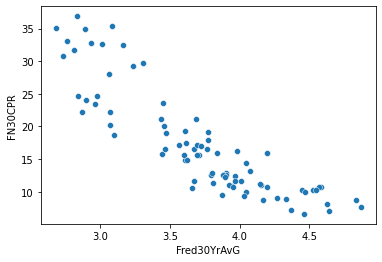

In [81]:
#Plotting CPR and mortgage rates provided by Freddy Mac, restricting to years 2015 - 2022

sns.scatterplot(data=MonthlyCPR15to21, x="Fred30YrAvG", y="FN30CPR")

In [82]:
#Now let's fit a linear model to the above scatter plot.
#Note the much better R squared score.

lmFred15to21 = sm.OLS.from_formula('FN30CPR ~ Fred30YrAvG', MonthlyCPR15to21)
resultFred15to21 = lmFred15to21.fit()
resultFred15to21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                FN30CPR   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     268.4
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           1.38e-27
Time:                        11:35:24   Log-Likelihood:                -232.57
No. Observations:                  84   AIC:                             469.1
Df Residuals:                      82   BIC:                             474.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      64.8316      2.944     22.022      0.000      58.975      70.688
Fred30YrAvG   -12.8335      0.783    -16.382      0.000     -14.392     -11.275
==============================================================================
Omnibus:                        4.317   Durbin-Watson:                   0.537
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                4.226
Skew:                           0.504   Prob(JB):                        0.121
Kurtosis:                       2.562   Cond. No.                         27.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='incentive_fred', ylabel='FN30CPR'>

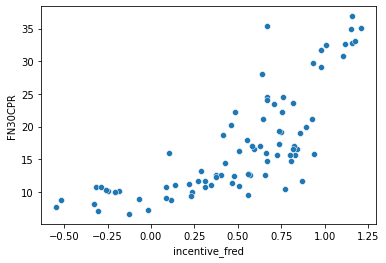

In [83]:
#Now let's plot CPR as a response to prepay incentive, using the Freddy Mac data from 15-21.
#Chris suggested that we should try fitting logistic curves to these types of scatter plots.
#You can sort of see an S shape happening here. 

sns.scatterplot(data=MonthlyCPR15to21, x="incentive_fred", y="FN30CPR")

******************************************************************

# Turn our attention to the Optimal Blue data. Our first goal is to repeat these three tasks, using OB data instead of FM.

******************************************************************

In [84]:
#Now I take a peek at the Optimal Blue Data

weeklyMortgageRatesOB

,Week,30YR,30YR1A,30YR1B,30YR1C,30YR1D,30YR1E,30YR2A,30YR2B,30YR2C,30YR2D,30YR2E,Month,Year
0,2015-01-02,4.171,4.542,4.242,4.122,4.057,3.994,4.535,4.372,4.298,4.190,4.139,1,2015
1,2015-01-05,4.122,4.484,4.265,4.154,4.038,3.967,4.534,4.300,4.289,4.157,4.090,1,2015
2,2015-01-06,4.022,4.387,4.120,4.029,3.914,3.870,4.441,4.264,4.190,4.112,4.032,1,2015
3,2015-01-07,4.035,4.392,4.155,4.054,3.974,3.872,4.475,4.266,4.218,4.074,4.026,1,2015
4,2015-01-08,4.062,4.433,4.160,4.054,3.958,3.894,4.487,4.349,4.285,4.145,4.042,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,2022-07-07,5.780,6.052,5.925,5.817,5.709,5.633,6.400,6.132,5.907,5.752,5.700,7,2022
1881,2022-07-08,5.829,6.142,5.945,5.875,5.786,5.680,6.287,5.986,6.045,5.856,5.738,7,2022
1882,2022-07-11,5.808,6.079,5.963,5.887,5.735,5.671,6.371,6.090,5.926,5.817,5.744,7,2022
1883,2022-07-12,5.778,6.193,5.898,5.842,5.716,5.643,6.364,6.006,5.893,5.807,5.706,7,2022


In [85]:
#As we can see above we still need to average out some columns 
#Additionally, so that we can match with the CPR table, we take out the info from 2022:

weeklyMortgageRatesOB15to21 = weeklyMortgageRatesOB.loc[weeklyMortgageRatesOB["Year"] <2022 ]

In [86]:
#Now we check that it worked:

weeklyMortgageRatesOB15to21

,Week,30YR,30YR1A,30YR1B,30YR1C,30YR1D,30YR1E,30YR2A,30YR2B,30YR2C,30YR2D,30YR2E,Month,Year
0,2015-01-02,4.171,4.542,4.242,4.122,4.057,3.994,4.535,4.372,4.298,4.190,4.139,1,2015
1,2015-01-05,4.122,4.484,4.265,4.154,4.038,3.967,4.534,4.300,4.289,4.157,4.090,1,2015
2,2015-01-06,4.022,4.387,4.120,4.029,3.914,3.870,4.441,4.264,4.190,4.112,4.032,1,2015
3,2015-01-07,4.035,4.392,4.155,4.054,3.974,3.872,4.475,4.266,4.218,4.074,4.026,1,2015
4,2015-01-08,4.062,4.433,4.160,4.054,3.958,3.894,4.487,4.349,4.285,4.145,4.042,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,2021-12-23,3.345,3.581,3.434,3.292,3.293,3.191,3.855,3.540,3.515,3.373,3.307,12,2021
1748,2021-12-27,3.344,3.594,3.460,3.295,3.269,3.191,3.845,3.573,3.436,3.379,3.294,12,2021
1749,2021-12-28,3.328,3.576,3.389,3.329,3.304,3.194,3.850,3.530,3.393,3.368,3.268,12,2021
1750,2021-12-29,3.365,3.635,3.390,3.358,3.295,3.222,3.904,3.551,3.514,3.383,3.305,12,2021


In [87]:
#Next, we edit the master data frame so that we include only the months from 2015 - 2022
#I call this the master data frame because it is the one that eventually has all the info

MonthlyCPR15to21 = MonthlyCPR94to21.loc[MonthlyCPR94to21["Year"] >=2015 ]

In [88]:
#Check to see that it worked
#note that there are 84 data points, 84 = 12 * 7

MonthlyCPR15to21

,Date,FN30CPR,FN30WAC,FN30WALA,FN30WAM,Month,Year,Fred30YrAvG,incentive_fred
89,2015-01-01,11.6,4.54,41,312,1,2015,3.6700,0.8700
88,2015-02-01,15.6,4.54,41,312,2,2015,3.7100,0.8300
87,2015-03-01,19.2,4.52,42,312,3,2015,3.7700,0.7500
86,2015-04-01,16.6,4.51,42,312,4,2015,3.6720,0.8380
85,2015-05-01,15.9,4.50,42,312,5,2015,3.8400,0.6600
...,...,...,...,...,...,...,...,...,...
10,2021-08-01,24.6,3.60,35,319,8,2021,2.8425,0.7575
9,2021-09-01,24.1,3.57,35,319,9,2021,2.9000,0.6700
8,2021-10-01,22.2,3.55,34,320,10,2021,3.0675,0.4825
7,2021-11-01,20.2,3.53,34,320,11,2021,3.0675,0.4625


In [89]:
#Now we make is a list containing the averages  of the weekly mortgage rates from Optimal Blue
#this will be stored as a column in the monthlyCPR15to21 data frame
#Once we successfully do this, we will repeat for the 1A, 1B, ... categories from the OB table as well

OBFRM_list = weeklyMortgageRatesOB15to21.groupby(['Year', 'Month']).mean()['30YR'].tolist()

In [90]:
#double check that the list is of the appropriate length of 84 = 7*12

len(OBFRM_list)

84

In [91]:
#add the averaged Optimal Blue morgage rates to the Master Data Frame

MonthlyCPR15to21["OB30YrAvG"] = OBFRM_list

C:\Users\kathe\AppData\Local\Temp/ipykernel_12056/3555251313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MonthlyCPR15to21["OB30YrAvG"] = OBFRM_list


In [92]:
#Double check that it worked
#Compare OB30YRAvG to Fred30YrAvg. They are communicating the same information, jus from two different sources
#The OB mortgage rates seem to be about .35 higher than the Freddy Mac rates

MonthlyCPR15to21

,Date,FN30CPR,FN30WAC,FN30WALA,FN30WAM,Month,Year,Fred30YrAvG,incentive_fred,OB30YrAvG
89,2015-01-01,11.6,4.54,41,312,1,2015,3.6700,0.8700,3.987400
88,2015-02-01,15.6,4.54,41,312,2,2015,3.7100,0.8300,4.054789
87,2015-03-01,19.2,4.52,42,312,3,2015,3.7700,0.7500,4.094591
86,2015-04-01,16.6,4.51,42,312,4,2015,3.6720,0.8380,4.002773
85,2015-05-01,15.9,4.50,42,312,5,2015,3.8400,0.6600,4.163100
...,...,...,...,...,...,...,...,...,...,...
10,2021-08-01,24.6,3.60,35,319,8,2021,2.8425,0.7575,3.048500
9,2021-09-01,24.1,3.57,35,319,9,2021,2.9000,0.6700,3.099762
8,2021-10-01,22.2,3.55,34,320,10,2021,3.0675,0.4825,3.251100
7,2021-11-01,20.2,3.53,34,320,11,2021,3.0675,0.4625,3.262737


In [93]:
#Add incentive using the WAC from Chris' July 14 data and the mortgage rates from OB.
#check that it worked.

MonthlyCPR15to21["incentive_OB"] = MonthlyCPR15to21["FN30WAC"] - MonthlyCPR15to21["OB30YrAvG"]
MonthlyCPR15to21

C:\Users\kathe\AppData\Local\Temp/ipykernel_12056/2555803029.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MonthlyCPR15to21["incentive_OB"] = MonthlyCPR15to21["FN30WAC"] - MonthlyCPR15to21["OB30YrAvG"]


,Date,FN30CPR,FN30WAC,FN30WALA,FN30WAM,Month,Year,Fred30YrAvG,incentive_fred,OB30YrAvG,incentive_OB
89,2015-01-01,11.6,4.54,41,312,1,2015,3.6700,0.8700,3.987400,0.552600
88,2015-02-01,15.6,4.54,41,312,2,2015,3.7100,0.8300,4.054789,0.485211
87,2015-03-01,19.2,4.52,42,312,3,2015,3.7700,0.7500,4.094591,0.425409
86,2015-04-01,16.6,4.51,42,312,4,2015,3.6720,0.8380,4.002773,0.507227
85,2015-05-01,15.9,4.50,42,312,5,2015,3.8400,0.6600,4.163100,0.336900
...,...,...,...,...,...,...,...,...,...,...,...
10,2021-08-01,24.6,3.60,35,319,8,2021,2.8425,0.7575,3.048500,0.551500
9,2021-09-01,24.1,3.57,35,319,9,2021,2.9000,0.6700,3.099762,0.470238
8,2021-10-01,22.2,3.55,34,320,10,2021,3.0675,0.4825,3.251100,0.298900
7,2021-11-01,20.2,3.53,34,320,11,2021,3.0675,0.4625,3.262737,0.267263



# In the next three lines of code, we produce 

## (1) A plot of CPR by mortgage rate for every month in the years 2015 - 2021, using data from Optimal Blue

## (2) A linear model fit from the data in part (1) featuring a strong negative correlation

## (3) A plot of CPR by incentive rate for every month in the years 2015 - 2021, using data from Optimal Blue and the weighted average coupon that Chris provided on July 14. This forms an S - shape

# Note the similarity with the same objects produced using Freddy Mac data from 2015 - 2021

<AxesSubplot:xlabel='OB30YrAvG', ylabel='FN30CPR'>

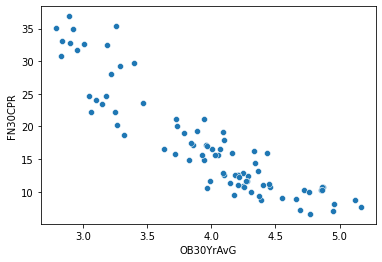

In [94]:
#Plotting CPR and mortgage rates provided by Optimal Blue, restricting to years 2015 - 2022

sns.scatterplot(data=MonthlyCPR15to21, x="OB30YrAvG", y="FN30CPR")

In [96]:
#Now let's fit a linear model to the above scatter plot.
#Note the R squared score is higher than the R squared for Freddy's data from 2015-2021, which was .766.

lmOB15to21 = sm.OLS.from_formula('FN30CPR ~ OB30YrAvG', MonthlyCPR15to21)
resultOB15to21 = lmOB15to21.fit()
resultOB15to21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                FN30CPR   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     374.7
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           2.56e-32
Time:                        11:35:50   Log-Likelihood:                -221.45
No. Observations:                  84   AIC:                             446.9
Df Residuals:                      82   BIC:                             451.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.9866      2.450     26.113      0.000      59.112      68.861
OB30YrAvG    -11.8138      0.610    -19.356      0.000     -13.028     -10.600
==============================================================================
Omnibus:                        2.275   Durbin-Watson:                   0.675
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                2.276
Skew:                           0.363   Prob(JB):                        0.320
Kurtosis:                       2.649   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='incentive_OB', ylabel='FN30CPR'>

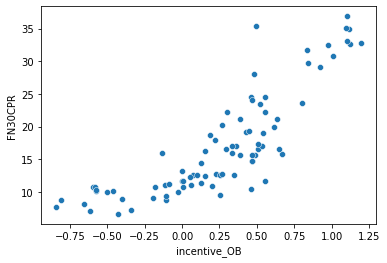

In [97]:
#Now let's plot CPR as a response to prepay incentive, using the Optimal Blue data from 15-21.
#Chris suggested that we should try fitting logistic curves to these types of scatter plots.
#You can see an S shape happening here. 

sns.scatterplot(data=MonthlyCPR15to21, x="incentive_OB", y="FN30CPR")

# Now we start looking at (1) mortgage rate, (2) CPR, and (3) WAC data, refined by (A) LTV ratio and (B) FICO score

In [98]:
#From Optimal Blue, average out the mortgage rates according to month/year, and save them as lists.
#Recall the labeling system is:

#1 corresponds to an LTV value <= 80, 
#2 corresponds to an LTV value >80

#A : FICO <680
#B : FICO in [680,699]
#C : FICO in [700,719]
#D : FICO in [720,739]
#E : FICO >740

#So, 30YR2D is 30-year fixed mortgage rates for with LTV value >80 whose FICO is in [720,739].

OBFRM1A_list = weeklyMortgageRatesOB15to21.groupby(['Year', 'Month']).mean()['30YR1A'].tolist()
OBFRM1B_list = weeklyMortgageRatesOB15to21.groupby(['Year', 'Month']).mean()['30YR1B'].tolist()
OBFRM1C_list = weeklyMortgageRatesOB15to21.groupby(['Year', 'Month']).mean()['30YR1C'].tolist()
OBFRM1D_list = weeklyMortgageRatesOB15to21.groupby(['Year', 'Month']).mean()['30YR1D'].tolist()
OBFRM1E_list = weeklyMortgageRatesOB15to21.groupby(['Year', 'Month']).mean()['30YR1E'].tolist()
OBFRM2A_list = weeklyMortgageRatesOB15to21.groupby(['Year', 'Month']).mean()['30YR2A'].tolist()
OBFRM2B_list = weeklyMortgageRatesOB15to21.groupby(['Year', 'Month']).mean()['30YR2B'].tolist()
OBFRM2C_list = weeklyMortgageRatesOB15to21.groupby(['Year', 'Month']).mean()['30YR2C'].tolist()
OBFRM2D_list = weeklyMortgageRatesOB15to21.groupby(['Year', 'Month']).mean()['30YR2D'].tolist()
OBFRM2E_list = weeklyMortgageRatesOB15to21.groupby(['Year', 'Month']).mean()['30YR2E'].tolist()

#Add those lists to the Master Data frame

MonthlyCPR15to21["OB30Yr1AAvG"] = OBFRM1A_list
MonthlyCPR15to21["OB30Yr1BAvG"] = OBFRM1B_list
MonthlyCPR15to21["OB30Yr1CAvG"] = OBFRM1C_list
MonthlyCPR15to21["OB30Yr1DAvG"] = OBFRM1D_list
MonthlyCPR15to21["OB30Yr1EAvG"] = OBFRM1E_list
MonthlyCPR15to21["OB30Yr2AAvG"] = OBFRM2A_list
MonthlyCPR15to21["OB30Yr2BAvG"] = OBFRM2B_list
MonthlyCPR15to21["OB30Yr2CAvG"] = OBFRM2C_list
MonthlyCPR15to21["OB30Yr2DAvG"] = OBFRM2D_list
MonthlyCPR15to21["OB30Yr2EAvG"] = OBFRM2E_list

# Check that it worked

MonthlyCPR15to21

C:\Users\kathe\AppData\Local\Temp/ipykernel_12056/2494958836.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MonthlyCPR15to21["OB30Yr1AAvG"] = OBFRM1A_list
C:\Users\kathe\AppData\Local\Temp/ipykernel_12056/2494958836.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MonthlyCPR15to21["OB30Yr1BAvG"] = OBFRM1B_list
C:\Users\kathe\AppData\Local\Temp/ipykernel_12056/2494958836.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,Date,FN30CPR,FN30WAC,FN30WALA,FN30WAM,Month,Year,Fred30YrAvG,incentive_fred,OB30YrAvG,...,OB30Yr1AAvG,OB30Yr1BAvG,OB30Yr1CAvG,OB30Yr1DAvG,OB30Yr1EAvG,OB30Yr2AAvG,OB30Yr2BAvG,OB30Yr2CAvG,OB30Yr2DAvG,OB30Yr2EAvG
89,2015-01-01,11.6,4.54,41,312,1,2015,3.6700,0.8700,3.987400,...,4.365050,4.098500,3.999600,3.902550,3.838500,4.438750,4.224350,4.149000,4.053150,3.977550
88,2015-02-01,15.6,4.54,41,312,2,2015,3.7100,0.8300,4.054789,...,4.420316,4.174684,4.057474,3.971895,3.901421,4.477789,4.257263,4.179053,4.103684,4.021474
87,2015-03-01,19.2,4.52,42,312,3,2015,3.7700,0.7500,4.094591,...,4.425045,4.208636,4.098455,4.015000,3.949455,4.447591,4.273455,4.228364,4.141864,4.059636
86,2015-04-01,16.6,4.51,42,312,4,2015,3.6720,0.8380,4.002773,...,4.335000,4.127727,4.021091,3.919864,3.849591,4.378818,4.192000,4.132091,4.057000,3.968136
85,2015-05-01,15.9,4.50,42,312,5,2015,3.8400,0.6600,4.163100,...,4.471150,4.263150,4.163850,4.083900,4.019650,4.539050,4.338950,4.288750,4.206650,4.127550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,2021-08-01,24.6,3.60,35,319,8,2021,2.8425,0.7575,3.048500,...,3.308818,3.139727,3.070818,2.994591,2.929500,3.489227,3.235091,3.171136,3.087091,3.009318
9,2021-09-01,24.1,3.57,35,319,9,2021,2.9000,0.6700,3.099762,...,3.349619,3.177952,3.113952,3.043429,2.983905,3.525476,3.264333,3.211095,3.126810,3.059476
8,2021-10-01,22.2,3.55,34,320,10,2021,3.0675,0.4825,3.251100,...,3.481350,3.316650,3.268400,3.188200,3.144350,3.617950,3.409400,3.363800,3.274800,3.206300
7,2021-11-01,20.2,3.53,34,320,11,2021,3.0675,0.4625,3.262737,...,3.506842,3.330789,3.263632,3.197579,3.142263,3.676474,3.422421,3.387000,3.287053,3.217158


In [100]:
#Here I import the data that Chris supplied on July 15 that provides the WAC and CPR depending on LTV and FICO
#I cleaned up the .csv file a bit in numbers prior to accessing in Python

FICO_LTV_Refined_WAC_CPR = pd.read_csv('../data/Cleaned_WAC_CPR.csv')

In [101]:
#Let's check that it worked

FICO_LTV_Refined_WAC_CPR.head(10)

,Bank Servicer(Y/N),Orig LTV Description,Credit Score Description,Factor Date,Weighted Average Gross Coupon,CPR 1M,CDR 1M,CCR 1M (Curtailment)
0,N,LowLTV,LowFICO,12/1/2021,4.442820,23.768235,5.767608,0.535018
1,Y,LowLTV,LowFICO,12/1/2021,4.429111,21.730050,5.929573,0.567926
2,N,LowLTV,LowFICO,11/1/2021,4.444406,24.538952,5.699338,0.419745
3,Y,LowLTV,LowFICO,11/1/2021,4.430299,19.913814,2.669405,0.471868
4,N,LowLTV,LowFICO,10/1/2021,4.452673,22.779575,4.357974,0.399944
5,Y,LowLTV,LowFICO,10/1/2021,4.436012,20.431296,2.303733,0.556107
6,N,LowLTV,LowFICO,9/1/2021,4.357093,23.758283,1.493629,0.242447
7,Y,LowLTV,LowFICO,9/1/2021,4.362113,21.466962,2.472987,0.214405
8,N,LowLTV,LowFICO,8/1/2021,4.357299,24.683979,1.599863,0.221304
9,Y,LowLTV,LowFICO,8/1/2021,4.362815,20.773994,2.714369,0.212264


In [102]:
# See that the date is stored as an object. 

FICO_LTV_Refined_WAC_CPR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Bank Servicer(Y/N)              2016 non-null   object 
 1   Orig LTV Description            2016 non-null   object 
 2   Credit Score Description        2016 non-null   object 
 3   Factor Date                     2016 non-null   object 
 4   Weighted Average Gross Coupon   2016 non-null   float64
 5   CPR 1M                          2016 non-null   float64
 6   CDR 1M                          240 non-null    float64
 7   CCR 1M (Curtailment)            2016 non-null   float64
dtypes: float64(4), object(4)
memory usage: 126.1+ KB


In [103]:
#Convert Factor Date to datetime type.

FICO_LTV_Refined_WAC_CPR['Factor Date'] = pd.to_datetime(FICO_LTV_Refined_WAC_CPR['Factor Date'])

In [104]:
#check that conversion to datetime worked

FICO_LTV_Refined_WAC_CPR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Bank Servicer(Y/N)              2016 non-null   object        
 1   Orig LTV Description            2016 non-null   object        
 2   Credit Score Description        2016 non-null   object        
 3   Factor Date                     2016 non-null   datetime64[ns]
 4   Weighted Average Gross Coupon   2016 non-null   float64       
 5   CPR 1M                          2016 non-null   float64       
 6   CDR 1M                          240 non-null    float64       
 7   CCR 1M (Curtailment)            2016 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 126.1+ KB


In [105]:
#Now we add columns to FICO_LTV_Refined_WAC_CPR for the month and year
#check that it worked

FICO_LTV_Refined_WAC_CPR["Month"] = pd.to_datetime(FICO_LTV_Refined_WAC_CPR['Factor Date']).dt.month
FICO_LTV_Refined_WAC_CPR["Year"] = pd.to_datetime(FICO_LTV_Refined_WAC_CPR['Factor Date']).dt.year
FICO_LTV_Refined_WAC_CPR.head()

,Bank Servicer(Y/N),Orig LTV Description,Credit Score Description,Factor Date,Weighted Average Gross Coupon,CPR 1M,CDR 1M,CCR 1M (Curtailment),Month,Year
0,N,LowLTV,LowFICO,2021-12-01,4.442820,23.768235,5.767608,0.535018,12,2021
1,Y,LowLTV,LowFICO,2021-12-01,4.429111,21.730050,5.929573,0.567926,12,2021
2,N,LowLTV,LowFICO,2021-11-01,4.444406,24.538952,5.699338,0.419745,11,2021
3,Y,LowLTV,LowFICO,2021-11-01,4.430299,19.913814,2.669405,0.471868,11,2021
4,N,LowLTV,LowFICO,2021-10-01,4.452673,22.779575,4.357974,0.399944,10,2021


In [106]:
#The FICO ranges that Chris provided are not as refined as those provided by Optimal Blue.
# We will continue to use the shorthand: Low LTV = 1, High LTV = 2, Bad credit = A, Good Credit = E
#(LowLTV, LowFICO) = 1A
#(LowLTV, HighFICO) = 1E
#(HighLTV, LowFICO) = 2A
#(HighLTV, HighFICO) = 2E

#we make four smaller data frames out of FICO_LTV_Refined_WAC_CPR based on these four possibilities:

WAC_CPR_1A = FICO_LTV_Refined_WAC_CPR.loc[(FICO_LTV_Refined_WAC_CPR['Orig LTV Description'] == 'LowLTV') & (FICO_LTV_Refined_WAC_CPR['Credit Score Description'] == 'LowFICO')]
WAC_CPR_1E = FICO_LTV_Refined_WAC_CPR.loc[(FICO_LTV_Refined_WAC_CPR['Orig LTV Description'] == 'LowLTV') & (FICO_LTV_Refined_WAC_CPR['Credit Score Description'] == 'HighFICO')]
WAC_CPR_2A = FICO_LTV_Refined_WAC_CPR.loc[(FICO_LTV_Refined_WAC_CPR['Orig LTV Description'] == 'HighLTV') & (FICO_LTV_Refined_WAC_CPR['Credit Score Description'] == 'LowFICO')]
WAC_CPR_2E = FICO_LTV_Refined_WAC_CPR.loc[(FICO_LTV_Refined_WAC_CPR['Orig LTV Description'] == 'HighLTV') & (FICO_LTV_Refined_WAC_CPR['Credit Score Description'] == 'HighFICO')]

In [107]:
#Check WAC_CPR_1A:

print(WAC_CPR_1A.info())
WAC_CPR_1A.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 839
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Bank Servicer(Y/N)              672 non-null    object        
 1   Orig LTV Description            672 non-null    object        
 2   Credit Score Description        672 non-null    object        
 3   Factor Date                     672 non-null    datetime64[ns]
 4   Weighted Average Gross Coupon   672 non-null    float64       
 5   CPR 1M                          672 non-null    float64       
 6   CDR 1M                          80 non-null     float64       
 7   CCR 1M (Curtailment)            672 non-null    float64       
 8   Month                           672 non-null    int64         
 9   Year                            672 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 57.8+ 

,Bank Servicer(Y/N),Orig LTV Description,Credit Score Description,Factor Date,Weighted Average Gross Coupon,CPR 1M,CDR 1M,CCR 1M (Curtailment),Month,Year
0,N,LowLTV,LowFICO,2021-12-01,4.442820,23.768235,5.767608,0.535018,12,2021
1,Y,LowLTV,LowFICO,2021-12-01,4.429111,21.730050,5.929573,0.567926,12,2021
2,N,LowLTV,LowFICO,2021-11-01,4.444406,24.538952,5.699338,0.419745,11,2021
3,Y,LowLTV,LowFICO,2021-11-01,4.430299,19.913814,2.669405,0.471868,11,2021
4,N,LowLTV,LowFICO,2021-10-01,4.452673,22.779575,4.357974,0.399944,10,2021


In [108]:
#Check WAC_CPR_1E:

print(WAC_CPR_1E.info())
WAC_CPR_1E.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 1512 to 1847
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Bank Servicer(Y/N)              336 non-null    object        
 1   Orig LTV Description            336 non-null    object        
 2   Credit Score Description        336 non-null    object        
 3   Factor Date                     336 non-null    datetime64[ns]
 4   Weighted Average Gross Coupon   336 non-null    float64       
 5   CPR 1M                          336 non-null    float64       
 6   CDR 1M                          40 non-null     float64       
 7   CCR 1M (Curtailment)            336 non-null    float64       
 8   Month                           336 non-null    int64         
 9   Year                            336 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 28

,Bank Servicer(Y/N),Orig LTV Description,Credit Score Description,Factor Date,Weighted Average Gross Coupon,CPR 1M,CDR 1M,CCR 1M (Curtailment),Month,Year
1512,N,LowLTV,HighFICO,2021-12-01,3.327899,3.797399,0.0,0.145143,12,2021
1513,Y,LowLTV,HighFICO,2021-12-01,3.388680,5.896410,0.0,0.305896,12,2021
1514,N,LowLTV,HighFICO,2021-11-01,3.348220,15.756722,0.0,0.075388,11,2021
1515,Y,LowLTV,HighFICO,2021-11-01,3.410686,11.793031,0.0,0.139640,11,2021
1516,N,LowLTV,HighFICO,2021-10-01,3.346188,4.281707,0.0,0.208961,10,2021


In [109]:
#Check WAC_CPR_2A:

print(WAC_CPR_2A.info())
WAC_CPR_2A.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 336 to 1007
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Bank Servicer(Y/N)              336 non-null    object        
 1   Orig LTV Description            336 non-null    object        
 2   Credit Score Description        336 non-null    object        
 3   Factor Date                     336 non-null    datetime64[ns]
 4   Weighted Average Gross Coupon   336 non-null    float64       
 5   CPR 1M                          336 non-null    float64       
 6   CDR 1M                          40 non-null     float64       
 7   CCR 1M (Curtailment)            336 non-null    float64       
 8   Month                           336 non-null    int64         
 9   Year                            336 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 28.

,Bank Servicer(Y/N),Orig LTV Description,Credit Score Description,Factor Date,Weighted Average Gross Coupon,CPR 1M,CDR 1M,CCR 1M (Curtailment),Month,Year
336,N,HighLTV,LowFICO,2021-12-01,4.899959,26.695509,1.630360,1.726738,12,2021
337,Y,HighLTV,LowFICO,2021-12-01,4.863685,14.571911,0.092833,1.496504,12,2021
338,N,HighLTV,LowFICO,2021-11-01,4.937782,22.616973,1.546446,1.038579,11,2021
339,Y,HighLTV,LowFICO,2021-11-01,4.886716,26.604269,0.957450,0.999001,11,2021
340,N,HighLTV,LowFICO,2021-10-01,4.978162,24.641970,1.338937,2.064062,10,2021


In [110]:
#Check WAC_CPR_2E:

print(WAC_CPR_2E.info())
WAC_CPR_2E.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 1848 to 2015
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Bank Servicer(Y/N)              168 non-null    object        
 1   Orig LTV Description            168 non-null    object        
 2   Credit Score Description        168 non-null    object        
 3   Factor Date                     168 non-null    datetime64[ns]
 4   Weighted Average Gross Coupon   168 non-null    float64       
 5   CPR 1M                          168 non-null    float64       
 6   CDR 1M                          20 non-null     float64       
 7   CCR 1M (Curtailment)            168 non-null    float64       
 8   Month                           168 non-null    int64         
 9   Year                            168 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 14

,Bank Servicer(Y/N),Orig LTV Description,Credit Score Description,Factor Date,Weighted Average Gross Coupon,CPR 1M,CDR 1M,CCR 1M (Curtailment),Month,Year
1848,N,HighLTV,HighFICO,2021-12-01,3.272206,17.842756,0.534581,0.890500,12,2021
1849,Y,HighLTV,HighFICO,2021-12-01,3.457099,18.687885,0.486181,1.122554,12,2021
1850,N,HighLTV,HighFICO,2021-11-01,3.286014,19.966481,0.376982,0.840675,11,2021
1851,Y,HighLTV,HighFICO,2021-11-01,3.475973,20.935330,0.344104,1.039868,11,2021
1852,N,HighLTV,HighFICO,2021-10-01,3.303084,23.128185,0.367449,0.856804,10,2021


In [111]:
print(WAC_CPR_1A.info())
WAC_CPR_1A.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 839
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Bank Servicer(Y/N)              672 non-null    object        
 1   Orig LTV Description            672 non-null    object        
 2   Credit Score Description        672 non-null    object        
 3   Factor Date                     672 non-null    datetime64[ns]
 4   Weighted Average Gross Coupon   672 non-null    float64       
 5   CPR 1M                          672 non-null    float64       
 6   CDR 1M                          80 non-null     float64       
 7   CCR 1M (Curtailment)            672 non-null    float64       
 8   Month                           672 non-null    int64         
 9   Year                            672 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 57.8+ 

,Bank Servicer(Y/N),Orig LTV Description,Credit Score Description,Factor Date,Weighted Average Gross Coupon,CPR 1M,CDR 1M,CCR 1M (Curtailment),Month,Year
0,N,LowLTV,LowFICO,2021-12-01,4.442820,23.768235,5.767608,0.535018,12,2021
1,Y,LowLTV,LowFICO,2021-12-01,4.429111,21.730050,5.929573,0.567926,12,2021
2,N,LowLTV,LowFICO,2021-11-01,4.444406,24.538952,5.699338,0.419745,11,2021
3,Y,LowLTV,LowFICO,2021-11-01,4.430299,19.913814,2.669405,0.471868,11,2021
4,N,LowLTV,LowFICO,2021-10-01,4.452673,22.779575,4.357974,0.399944,10,2021


In [112]:
#Now we add 8 columns to our Master Data Frame.
# For each combo (1A, 1E, 2A, 2E), we add WAC and CPR
#Then we check that it worked

MonthlyCPR15to21['CPR_1A'] = WAC_CPR_1A.groupby(['Year', 'Month']).mean()['CPR 1M'].tolist()
MonthlyCPR15to21['CPR_1E'] = WAC_CPR_1E.groupby(['Year', 'Month']).mean()['CPR 1M'].tolist()
MonthlyCPR15to21['CPR_2A'] = WAC_CPR_2A.groupby(['Year', 'Month']).mean()['CPR 1M'].tolist()
MonthlyCPR15to21['CPR_2E'] = WAC_CPR_2E.groupby(['Year', 'Month']).mean()['CPR 1M'].tolist()

MonthlyCPR15to21['WAC_1A'] = WAC_CPR_1A.groupby(['Year', 'Month']).mean()['Weighted Average Gross Coupon '].tolist()
MonthlyCPR15to21['WAC_1E'] = WAC_CPR_1E.groupby(['Year', 'Month']).mean()['Weighted Average Gross Coupon '].tolist()
MonthlyCPR15to21['WAC_2A'] = WAC_CPR_2A.groupby(['Year', 'Month']).mean()['Weighted Average Gross Coupon '].tolist()
MonthlyCPR15to21['WAC_2E'] = WAC_CPR_2E.groupby(['Year', 'Month']).mean()['Weighted Average Gross Coupon '].tolist()

print(MonthlyCPR15to21.columns)
MonthlyCPR15to21

Index(['Date', 'FN30CPR', 'FN30WAC', 'FN30WALA', 'FN30WAM', 'Month', 'Year',
       'Fred30YrAvG', 'incentive_fred', 'OB30YrAvG', 'incentive_OB',
       'OB30Yr1AAvG', 'OB30Yr1BAvG', 'OB30Yr1CAvG', 'OB30Yr1DAvG',
       'OB30Yr1EAvG', 'OB30Yr2AAvG', 'OB30Yr2BAvG', 'OB30Yr2CAvG',
       'OB30Yr2DAvG', 'OB30Yr2EAvG', 'CPR_1A', 'CPR_1E', 'CPR_2A', 'CPR_2E',
       'WAC_1A', 'WAC_1E', 'WAC_2A', 'WAC_2E'],
      dtype='object')


C:\Users\kathe\AppData\Local\Temp/ipykernel_12056/374022331.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MonthlyCPR15to21['CPR_1A'] = WAC_CPR_1A.groupby(['Year', 'Month']).mean()['CPR 1M'].tolist()
C:\Users\kathe\AppData\Local\Temp/ipykernel_12056/374022331.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MonthlyCPR15to21['CPR_1E'] = WAC_CPR_1E.groupby(['Year', 'Month']).mean()['CPR 1M'].tolist()
C:\Users\kathe\AppData\Local\Temp/ipykernel_12056/374022331.py:7: SettingWithCopyWarning: 
A value is 

,Date,FN30CPR,FN30WAC,FN30WALA,FN30WAM,Month,Year,Fred30YrAvG,incentive_fred,OB30YrAvG,...,OB30Yr2DAvG,OB30Yr2EAvG,CPR_1A,CPR_1E,CPR_2A,CPR_2E,WAC_1A,WAC_1E,WAC_2A,WAC_2E
89,2015-01-01,11.6,4.54,41,312,1,2015,3.6700,0.8700,3.987400,...,4.053150,3.977550,6.654636,8.028442,3.850608,9.046153,4.244573,3.788112,4.550262,4.104322
88,2015-02-01,15.6,4.54,41,312,2,2015,3.7100,0.8300,4.054789,...,4.103684,4.021474,7.190062,12.269763,3.950400,14.662869,4.241732,3.792748,4.536822,4.106099
87,2015-03-01,19.2,4.52,42,312,3,2015,3.7700,0.7500,4.094591,...,4.141864,4.059636,9.197441,14.130389,7.749426,16.704255,4.237796,3.792115,4.530664,4.103307
86,2015-04-01,16.6,4.51,42,312,4,2015,3.6720,0.8380,4.002773,...,4.057000,3.968136,8.266539,15.315323,12.485805,12.326114,4.223291,3.790940,4.511825,4.095267
85,2015-05-01,15.9,4.50,42,312,5,2015,3.8400,0.6600,4.163100,...,4.206650,4.127550,8.854422,8.326501,7.271809,12.526079,4.218045,3.780464,4.489869,4.087057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,2021-08-01,24.6,3.60,35,319,8,2021,2.8425,0.7575,3.048500,...,3.087091,3.009318,22.620600,24.732861,28.912720,27.003027,4.126317,3.399966,4.500551,3.449570
9,2021-09-01,24.1,3.57,35,319,9,2021,2.9000,0.6700,3.099762,...,3.126810,3.059476,22.693357,14.455137,22.689853,26.108463,4.109466,3.372452,4.476908,3.423966
8,2021-10-01,22.2,3.55,34,320,10,2021,3.0675,0.4825,3.251100,...,3.274800,3.206300,20.281965,15.481567,24.744651,23.300721,3.990839,3.283901,4.554887,3.401418
7,2021-11-01,20.2,3.53,34,320,11,2021,3.0675,0.4625,3.262737,...,3.287053,3.217158,21.241481,15.014395,25.744316,20.450905,3.973426,3.273404,4.526624,3.380993


In [113]:
MonthlyCPR15to21.columns

Index(['Date', 'FN30CPR', 'FN30WAC', 'FN30WALA', 'FN30WAM', 'Month', 'Year',
       'Fred30YrAvG', 'incentive_fred', 'OB30YrAvG', 'incentive_OB',
       'OB30Yr1AAvG', 'OB30Yr1BAvG', 'OB30Yr1CAvG', 'OB30Yr1DAvG',
       'OB30Yr1EAvG', 'OB30Yr2AAvG', 'OB30Yr2BAvG', 'OB30Yr2CAvG',
       'OB30Yr2DAvG', 'OB30Yr2EAvG', 'CPR_1A', 'CPR_1E', 'CPR_2A', 'CPR_2E',
       'WAC_1A', 'WAC_1E', 'WAC_2A', 'WAC_2E'],
      dtype='object')

In [114]:
#Now, the last things we need to add to our master Data Frame is the incentive for each of the four classes
#Remember that incentive is always WAC - Mortgage rate
#we have WAC and Mortgage rate for all four types

MonthlyCPR15to21['incentive_1A'] = MonthlyCPR15to21['WAC_1A'] - MonthlyCPR15to21['OB30Yr1AAvG']
MonthlyCPR15to21['incentive_1E'] = MonthlyCPR15to21['WAC_1E'] - MonthlyCPR15to21['OB30Yr1EAvG']
MonthlyCPR15to21['incentive_2A'] = MonthlyCPR15to21['WAC_2A'] - MonthlyCPR15to21['OB30Yr2AAvG']
MonthlyCPR15to21['incentive_2E'] = MonthlyCPR15to21['WAC_2E'] - MonthlyCPR15to21['OB30Yr2EAvG']
MonthlyCPR15to21

C:\Users\kathe\AppData\Local\Temp/ipykernel_12056/1939627412.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MonthlyCPR15to21['incentive_1A'] = MonthlyCPR15to21['WAC_1A'] - MonthlyCPR15to21['OB30Yr1AAvG']
C:\Users\kathe\AppData\Local\Temp/ipykernel_12056/1939627412.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MonthlyCPR15to21['incentive_1E'] = MonthlyCPR15to21['WAC_1E'] - MonthlyCPR15to21['OB30Yr1EAvG']
C:\Users\kathe\AppData\Local\Temp/ipykernel_12056/1939627412.py:7: SettingWithCopyWarning: 
A 

,Date,FN30CPR,FN30WAC,FN30WALA,FN30WAM,Month,Year,Fred30YrAvG,incentive_fred,OB30YrAvG,...,CPR_2A,CPR_2E,WAC_1A,WAC_1E,WAC_2A,WAC_2E,incentive_1A,incentive_1E,incentive_2A,incentive_2E
89,2015-01-01,11.6,4.54,41,312,1,2015,3.6700,0.8700,3.987400,...,3.850608,9.046153,4.244573,3.788112,4.550262,4.104322,-0.120477,-0.050388,0.111512,0.126772
88,2015-02-01,15.6,4.54,41,312,2,2015,3.7100,0.8300,4.054789,...,3.950400,14.662869,4.241732,3.792748,4.536822,4.106099,-0.178584,-0.108673,0.059032,0.084625
87,2015-03-01,19.2,4.52,42,312,3,2015,3.7700,0.7500,4.094591,...,7.749426,16.704255,4.237796,3.792115,4.530664,4.103307,-0.187249,-0.157340,0.083073,0.043671
86,2015-04-01,16.6,4.51,42,312,4,2015,3.6720,0.8380,4.002773,...,12.485805,12.326114,4.223291,3.790940,4.511825,4.095267,-0.111709,-0.058651,0.133007,0.127131
85,2015-05-01,15.9,4.50,42,312,5,2015,3.8400,0.6600,4.163100,...,7.271809,12.526079,4.218045,3.780464,4.489869,4.087057,-0.253105,-0.239186,-0.049181,-0.040493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,2021-08-01,24.6,3.60,35,319,8,2021,2.8425,0.7575,3.048500,...,28.912720,27.003027,4.126317,3.399966,4.500551,3.449570,0.817499,0.470466,1.011324,0.440252
9,2021-09-01,24.1,3.57,35,319,9,2021,2.9000,0.6700,3.099762,...,22.689853,26.108463,4.109466,3.372452,4.476908,3.423966,0.759847,0.388547,0.951432,0.364490
8,2021-10-01,22.2,3.55,34,320,10,2021,3.0675,0.4825,3.251100,...,24.744651,23.300721,3.990839,3.283901,4.554887,3.401418,0.509489,0.139551,0.936937,0.195118
7,2021-11-01,20.2,3.53,34,320,11,2021,3.0675,0.4625,3.262737,...,25.744316,20.450905,3.973426,3.273404,4.526624,3.380993,0.466584,0.131140,0.850151,0.163835


# Low LTV, Low FICO (1A):

## (i) Scatter plot of CPR by rate

## (ii) Linear model fit to part (i)

## (iii) CPR response to incentive

<AxesSubplot:xlabel='OB30Yr1AAvG', ylabel='CPR_1A'>

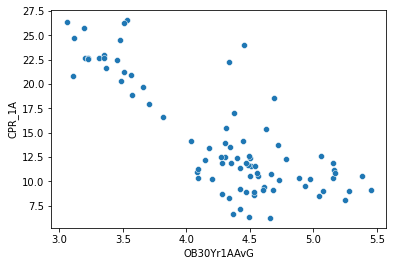

In [115]:
#(i) Plotting CPR and mortgage rates for Low LTV, Low FICO, restricting to years 2015 - 2022

sns.scatterplot(data=MonthlyCPR15to21, x="OB30Yr1AAvG", y="CPR_1A")

In [116]:
#(ii) Now let's fit a linear model to the above scatter plot.

lm1A = sm.OLS.from_formula('CPR_1A ~ OB30Yr1AAvG', MonthlyCPR15to21)
result1A = lm1A.fit()
result1A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CPR_1A   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     148.1
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           4.64e-20
Time:                        12:10:28   Log-Likelihood:                -221.86
No. Observations:                  84   AIC:                             447.7
Df Residuals:                      82   BIC:                             452.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      46.1633      2.648     17.432      0.000      40.895      51.431
OB30Yr1AAvG    -7.4561      0.613    -12.169      0.000      -8.675      -6.237
==============================================================================
Omnibus:                        4.896   Durbin-Watson:                   1.311
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                4.158
Skew:                           0.450   Prob(JB):                        0.125
Kurtosis:                       3.615   Cond. No.                         32.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='incentive_1A', ylabel='CPR_1A'>

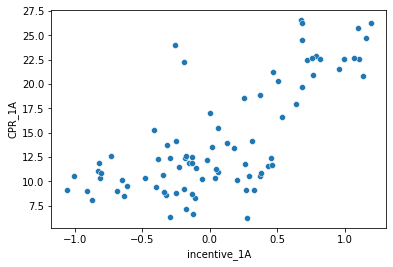

In [117]:
# (iii) Now let's plot CPR as a response to prepay incentive for the 1A group
#Chris suggested that we should try fitting logistic curves to these types of scatter plots.
#You can see a very rough S shape happening here. 

sns.scatterplot(data=MonthlyCPR15to21, x="incentive_1A", y="CPR_1A")

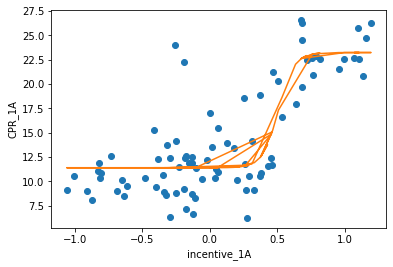

In [153]:
import scipy.optimize as opt
import matplotlib.pyplot as plt

x = MonthlyCPR15to21["incentive_1A"]
y = MonthlyCPR15to21["CPR_1A"]

def f(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

popt, pcov = opt.curve_fit(f, x, y, method="trf")
y_fit = f(x, *popt)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y, 'o')
ax.plot(x, y_fit, '-')
plt.xlabel("incentive_1A")
plt.ylabel("CPR_1A")
plt.show()

# Low LTV, high FICO (1E):

## (i) Scatter plot of CPR by rate

## (ii) Linear model fit to part (i)

## (iii) CPR response to incentive

<AxesSubplot:xlabel='OB30Yr1EAvG', ylabel='CPR_1E'>

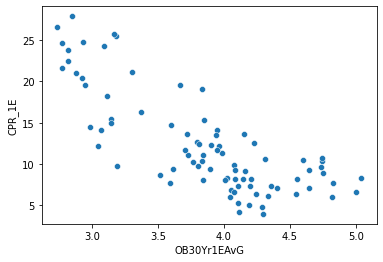

In [118]:
#(i) Plotting CPR and mortgage rates for Low LTV, High FICO, restricting to years 2015 - 2022

sns.scatterplot(data=MonthlyCPR15to21, x="OB30Yr1EAvG", y="CPR_1E")

In [119]:
#(ii) Now let's fit a linear model to the above scatter plot.

lm1E = sm.OLS.from_formula('CPR_1E ~ OB30Yr1EAvG', MonthlyCPR15to21)
result1E = lm1E.fit()
result1E.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CPR_1E   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     129.2
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           1.60e-18
Time:                        12:10:28   Log-Likelihood:                -230.34
No. Observations:                  84   AIC:                             464.7
Df Residuals:                      82   BIC:                             469.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      42.6052      2.697     15.797      0.000      37.240      47.971
OB30Yr1EAvG    -7.8717      0.693    -11.365      0.000      -9.250      -6.494
==============================================================================
Omnibus:                        3.529   Durbin-Watson:                   1.161
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                2.235
Skew:                           0.186   Prob(JB):                        0.327
Kurtosis:                       2.293   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='incentive_1E', ylabel='CPR_1E'>

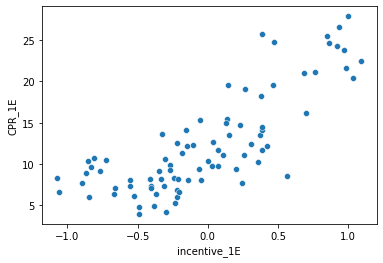

In [120]:
# (iii) Now let's plot CPR as a response to prepay incentive for the 1E group.
#Chris suggested that we should try fitting logistic curves to these types of scatter plots. 

sns.scatterplot(data=MonthlyCPR15to21, x="incentive_1E", y="CPR_1E")

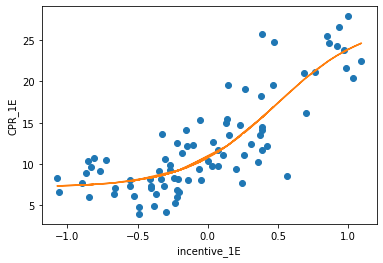

In [154]:
x = MonthlyCPR15to21["incentive_1E"]
y = MonthlyCPR15to21["CPR_1E"]

def f(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

popt, pcov = opt.curve_fit(f, x, y, method="trf")
y_fit = f(x, *popt)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y, 'o')
ax.plot(x, y_fit, '-')
plt.xlabel("incentive_1E")
plt.ylabel("CPR_1E")
plt.show()

# High LTV, Low FICO (2A):

## (i) Scatter plot of CPR by rate

## (ii) Linear model fit to part (i)

## (iii) CPR response to incentive

<AxesSubplot:xlabel='OB30Yr2AAvG', ylabel='CPR_2A'>

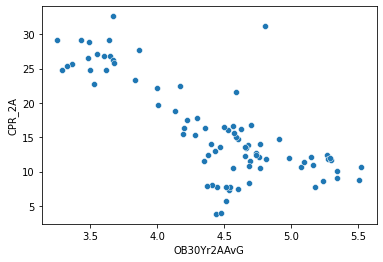

In [121]:
#(i) Plotting CPR and mortgage rates for High LTV, Low FICO, restricting to years 2015 - 2022

sns.scatterplot(data=MonthlyCPR15to21, x="OB30Yr2AAvG", y="CPR_2A")

In [122]:
#(ii) Now let's fit a linear model to the above scatter plot.

lm2A = sm.OLS.from_formula('CPR_2A ~ OB30Yr2AAvG', MonthlyCPR15to21)
result2A = lm2A.fit()
result2A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CPR_2A   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     116.4
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           2.09e-17
Time:                        12:10:28   Log-Likelihood:                -247.27
No. Observations:                  84   AIC:                             498.5
Df Residuals:                      82   BIC:                             503.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      57.8185      3.908     14.794      0.000      50.044      65.593
OB30Yr2AAvG    -9.4477      0.876    -10.790      0.000     -11.189      -7.706
==============================================================================
Omnibus:                       10.520   Durbin-Watson:                   0.956
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               26.878
Skew:                           0.159   Prob(JB):                     1.46e-06
Kurtosis:                       5.753   Cond. No.                         36.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='incentive_2A', ylabel='CPR_2A'>

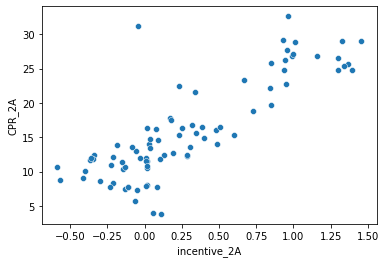

In [123]:
# (iii) Now let's plot CPR as a response to prepay incentive for the 2A group
#Chris suggested that we should try fitting logistic curves to these types of scatter plots.

sns.scatterplot(data=MonthlyCPR15to21, x="incentive_2A", y="CPR_2A")

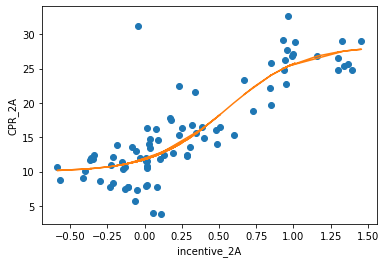

In [155]:
x = MonthlyCPR15to21["incentive_2A"]
y = MonthlyCPR15to21["CPR_2A"]

def f(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

popt, pcov = opt.curve_fit(f, x, y, method="trf")
y_fit = f(x, *popt)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y, 'o')
ax.plot(x, y_fit, '-')
plt.xlabel("incentive_2A")
plt.ylabel("CPR_2A")
plt.show()

# High LTV, High FICO (2B):

## (i) Scatter plot of CPR by rate

## (ii) Linear model fit to part (i)

## (iii) CPR response to incentive

<AxesSubplot:xlabel='OB30Yr2EAvG', ylabel='CPR_2E'>

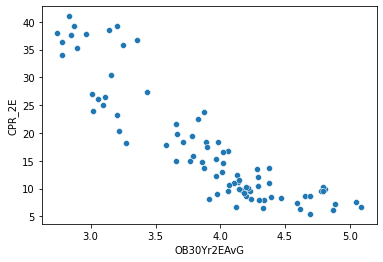

In [124]:
#(i) Plotting CPR and mortgage rates for High LTV, High FICO, restricting to years 2015 - 2022

sns.scatterplot(data=MonthlyCPR15to21, x="OB30Yr2EAvG", y="CPR_2E")

In [125]:
#(ii) Now let's fit a linear model to the above scatter plot.

lm2E = sm.OLS.from_formula('CPR_2E ~ OB30Yr2EAvG', MonthlyCPR15to21)
result2E = lm2E.fit()
result2E.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CPR_2E   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     310.1
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           1.35e-29
Time:                        12:10:29   Log-Likelihood:                -247.90
No. Observations:                  84   AIC:                             499.8
Df Residuals:                      82   BIC:                             504.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      75.2960      3.343     22.524      0.000      68.646      81.946
OB30Yr2EAvG   -14.8864      0.845    -17.610      0.000     -16.568     -13.205
==============================================================================
Omnibus:                        3.797   Durbin-Watson:                   0.535
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                3.758
Skew:                           0.481   Prob(JB):                        0.153
Kurtosis:                       2.614   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='incentive_2E', ylabel='CPR_2E'>

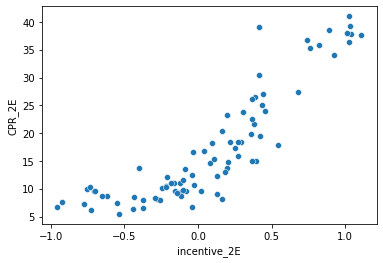

In [126]:
# (iii) Now let's plot CPR as a response to prepay incentive for the 2E group
#Chris suggested that we should try fitting logistic curves to these types of scatter plots.
#This one seems to have the strongest S - shape

sns.scatterplot(data=MonthlyCPR15to21, x="incentive_2E", y="CPR_2E")

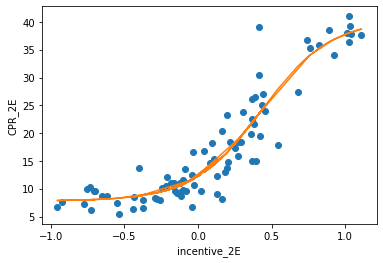

In [156]:
x = MonthlyCPR15to21["incentive_2E"]
y = MonthlyCPR15to21["CPR_2E"]

def f(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

popt, pcov = opt.curve_fit(f, x, y, method="trf")
y_fit = f(x, *popt)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y, 'o')
ax.plot(x, y_fit, '-')
plt.xlabel("incentive_2E")
plt.ylabel("CPR_2E")
plt.show()